In [1]:
import geopandas as gpd
import rasterio
import os
import rasterio.plot
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
# import fiona 
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from rasterio.plot import show

Monthly average AOD dataset saved to AOD_filtered_August_2012.tif


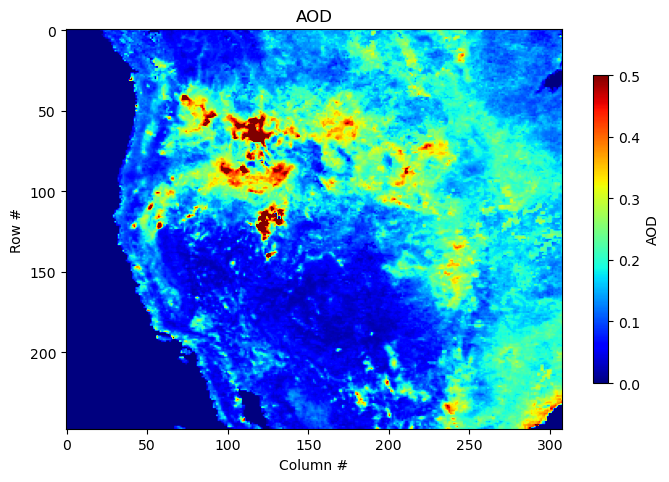

In [2]:
aod_path = input('input filepath: ')
year = input('year: ')

def readFiles(aod_path, aod_year): 
    files = []
    daily_sum = None
    valid_pixel_count = None
    raster_files = []
    
    for file in os.listdir(aod_path):
        if file.endswith(".tif"):  
            new_aod_path = os.path.join(aod_path, file)
            files.append(new_aod_path)
   
    for file in files:
        with rasterio.open(file) as src:
            data = src.read(1).astype(float)  
            # rescaled_data[rescaled_data == -9999] = np.nan  
            # new_aod_path = rasterio.open(aod_path)
            # rst = src.read()
            squeezed_rst = np.squeeze(data)        
            new_df = pd.DataFrame(squeezed_rst) 
            processed_df = new_df.replace(-9999, np.nan)
            rescaled = 0.0010000000474974513 * (processed_df - 0.0)
            profile = src.profile
            raster_files.append(rescaled)

    stacked_rasters = np.stack(raster_files, axis=0)
    valid_pixel_count = np.sum(~np.isnan(stacked_rasters), axis=0)
    sum_values = np.nansum(stacked_rasters, axis=0)
    
    average = np.divide(sum_values, valid_pixel_count, where=valid_pixel_count>0)
    
    average[np.isnan(average)] = -9999            

    profile.update(dtype=rasterio.float32, count=1, nodata=-9999, compress='lzw')
    output = f'AOD_filtered_August_{aod_year}.tif'

    with rasterio.open(output, "w", **profile) as dst:
        dst.write(average.astype(rasterio.float32), 1)

    print(f"Monthly average AOD dataset saved to {output}")

    with rasterio.open(output) as src:
        plot_data = src.read(1) 

    plt.figure(figsize=(8, 8))
    plt.imshow(plot_data, cmap="jet", vmin=0, vmax=0.5)
    plt.colorbar(label="AOD", shrink=0.5)
    plt.title("AOD") 
    plt.xlabel("Column #")
    plt.ylabel("Row #")
    plt.show()

readFiles(aod_path, year)

Monthly average AOD dataset saved to AOD_filtered_August_2020.tif


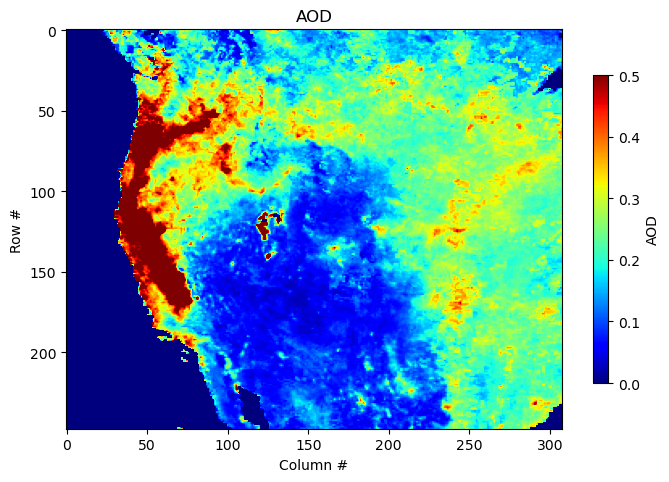

In [3]:
aod_path = input('input filepath: ')
year = input('year: ')
readFiles(aod_path, year)

Monthly average AOD dataset saved to AOD_filtered_August_2021.tif


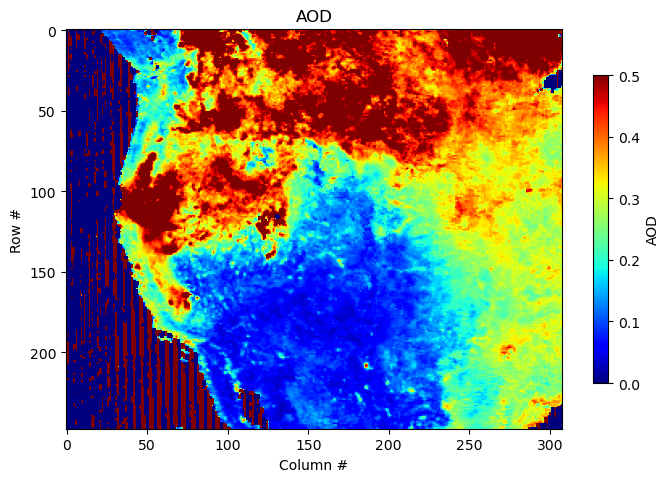

In [4]:
aod_path = input('input filepath: ')
year = input('year: ')
readFiles(aod_path, year)

AOD_August_2020.tif
/Users/lberg/Desktop/Adjusted_wavelengths/AOD_August_2020.tif
PROJCS["WGS 1984. Custom Ellipsoid: Semi-major axis=6378137.000000, Semi-minor axis=6356752.314245.;scale=0.00100000004749745131,offset=0.00000000000000000000",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.25722356049,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Albers_Conic_Equal_Area"],PARAMETER["latitude_of_center",0],PARAMETER["longitude_of_center",-109.8],PARAMETER["standard_parallel_1",47.2333333333333],PARAMETER["standard_parallel_2",32.9666666666667],PARAMETER["false_easting",0],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH]]
{'driver': 'GTiff', 'dtype': 'float32', 'nodata': -9999.0, 'width': 308, 'height': 248, 'count': 1, 'crs': CRS.from_wkt('PROJCS["WGS 1984. Custom Ellipsoid: Semi-major

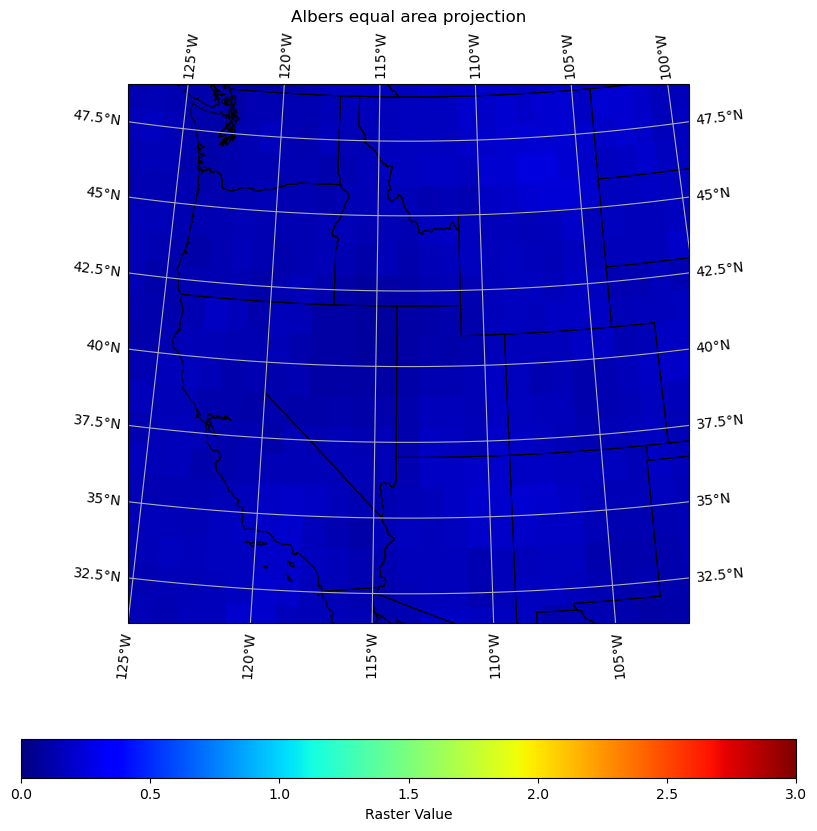

AOD_August_2021.tif
/Users/lberg/Desktop/Adjusted_wavelengths/AOD_August_2021.tif
PROJCS["WGS 1984. Custom Ellipsoid: Semi-major axis=6378137.000000, Semi-minor axis=6356752.314245.;scale=0.00100000004749745131,offset=0.00000000000000000000",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.25722356049,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Albers_Conic_Equal_Area"],PARAMETER["latitude_of_center",0],PARAMETER["longitude_of_center",-109.8],PARAMETER["standard_parallel_1",47.2333333333333],PARAMETER["standard_parallel_2",32.9666666666667],PARAMETER["false_easting",0],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH]]
{'driver': 'GTiff', 'dtype': 'float32', 'nodata': -9999.0, 'width': 308, 'height': 248, 'count': 1, 'crs': CRS.from_wkt('PROJCS["WGS 1984. Custom Ellipsoid: Semi-major

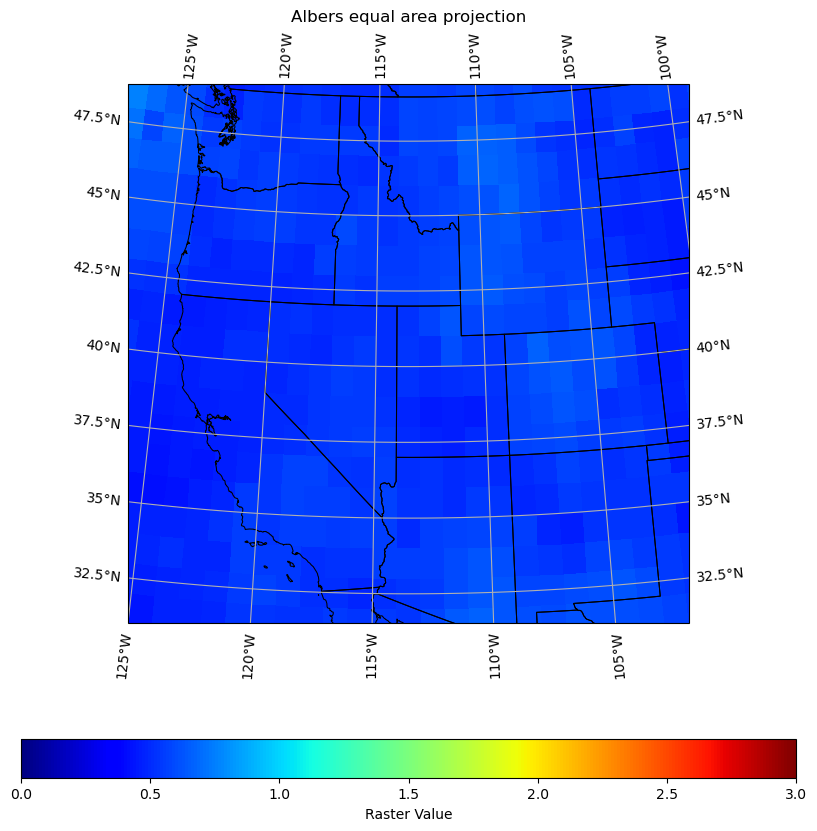

AOD_August_2018.tif
/Users/lberg/Desktop/Adjusted_wavelengths/AOD_August_2018.tif
PROJCS["WGS 1984. Custom Ellipsoid: Semi-major axis=6378137.000000, Semi-minor axis=6356752.314245.;scale=0.00100000004749745131,offset=0.00000000000000000000",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.25722356049,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Albers_Conic_Equal_Area"],PARAMETER["latitude_of_center",0],PARAMETER["longitude_of_center",-109.8],PARAMETER["standard_parallel_1",47.2333333333333],PARAMETER["standard_parallel_2",32.9666666666667],PARAMETER["false_easting",0],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH]]
{'driver': 'GTiff', 'dtype': 'float32', 'nodata': -9999.0, 'width': 308, 'height': 248, 'count': 1, 'crs': CRS.from_wkt('PROJCS["WGS 1984. Custom Ellipsoid: Semi-major

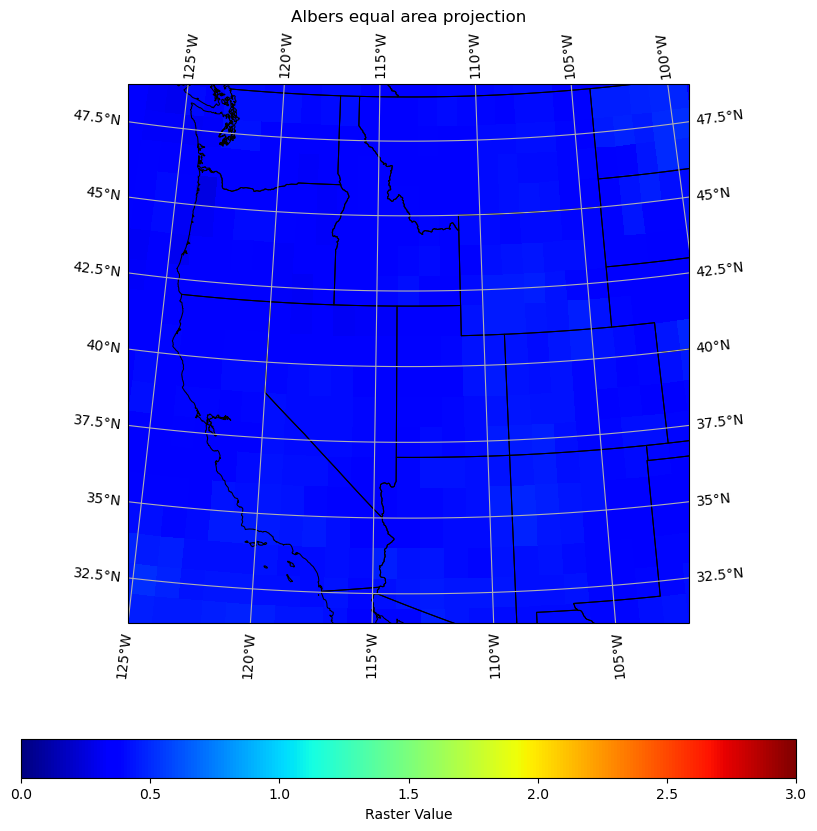

In [65]:
filepath = os.path.join(os.getcwd())
extent = [-125, -102, 31, 49]
central_lon = np.mean(extent[:2]) 

for file in os.listdir(filepath):
    if file.endswith('.tif'):
        print(file)
        
        with rasterio.open(os.path.join(filepath, file)) as rst:
            path = os.path.join(filepath, file)
            print(path)
            # print(rst.crs)
            # print(rst.)
            raster_data = rst.read(1)
            transform = rst.transform
            print(rst.crs)
            print(rst.meta)
            print(transform)
            print(type(rst))
                        
            fig, ax = plt.subplots(figsize=(10, 10), subplot_kw={'projection': ccrs.AlbersEqualArea(central_longitude=central_lon)})
            ax.set_extent(extent, crs=ccrs.PlateCarree())  
            ax.add_feature(cfeature.STATES.with_scale('10m'), linewidth=0.75, edgecolor='k', zorder=1)
            
            cs = ax.pcolormesh(raster_data, transform=ccrs.PlateCarree(), cmap='jet', zorder = 0)         

            ax.gridlines(draw_labels=True)
            cs.set_clim(vmin = 0, vmax = 3)
            plt.colorbar(cs, ax=ax, orientation='horizontal', label='Raster Value')
            plt.title("Albers equal area projection")
            plt.show()

In [2]:
extent = [-125, -102, 31, 49]
central_lon = np.mean(extent[:2])
aod_path = os.path.join(os.getcwd(), 'test.aod/MYD04_L2.A2020256.mosaic.061.2025010022829.pssgmcrpgs_000502321564.Deep_Blue_Aerosol_Optical_Depth_550_Land-Deep_Blue_Aerosol_Optical_Depth_550_Land.tif')

new_aod_path = rasterio.open(aod_path)
rst = new_aod_path.read()
squeezed_rst = np.squeeze(rst)        
new_df = pd.DataFrame(squeezed_rst) 
processed_df = new_df.replace(-9999, np.nan)

rescaled = 0.0010000000474974513 * (new_df - 0.0)
masked_data = np.ma.masked_invalid(rescaled)

ax = plt.axes(projection=ccrs.AlbersEqualArea(central_lon))       
ax.set_extent(extent)
cs = ax.pcolormesh(masked_data, transform=ccrs.PlateCarree(), zorder = 0)       
ax.add_feature(cartopy.feature.STATES.with_scale('10m'), linewidth = 0.75, edgecolor = 'k', zorder = 1)

plt.cm.ScalarMappable.set_clim(cs,vmin = 0, vmax = 3)
# plt.set_cmap(plt.cm.jet)
plt.cm.ScalarMappable(cmap="jet")

cm = plt.get_cmap()


plt.imshow(masked_data, cmap="jet", vmin=0, vmax=3.5)
plt.colorbar(label="aod", shrink=0.5)
plt.title("aod")
plt.xlabel("Column #")
plt.ylabel("Row #")
plt.show()
plt.close()


RasterioIOError: /Users/lberg/Desktop/Adjusted_wavelengths/test.aod/MYD04_L2.A2020256.mosaic.061.2025010022829.pssgmcrpgs_000502321564.Deep_Blue_Aerosol_Optical_Depth_550_Land-Deep_Blue_Aerosol_Optical_Depth_550_Land.tif: No such file or directory